# Dataset exploration
In this notebook, I explore the dataset for use in the methods section of the paper.

## Setup

In [45]:
import glob
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from pytorch_lightning import seed_everything

In [11]:
#Grabbing stuff out of the config
config = json.load(open('/Users/emiliolr/Desktop/counting-cranes/config.json', 'r'))
DATA_FP = config['data_filepath_local']
SEED = config['random_seed']

## Checking distribution of data across time/AGL

In [2]:
#Bringing in the metadata files
metadata_1 = pd.read_csv('~/Desktop/Conservation Research/processed_imagery/20210321_193700_metadata.csv')
metadata_2 = pd.read_csv('~/Desktop/Conservation Research/processed_imagery/20210321_213000_metadata_FLIR1 CAM1.csv')
metadata_3 = pd.read_csv('~/Desktop/Conservation Research/processed_imagery/20210321_224200_metadata_FLIR1 CAM1.csv')
metadata_4 = pd.read_csv('~/Desktop/Conservation Research/processed_imagery/20210321_213000_metadata_FLIR2 CAM1.csv')
metadata_5 = pd.read_csv('~/Desktop/Conservation Research/processed_imagery/20210321_224200_metadata_FLIR2 CAM1.csv')

#  putting everything into one DF
metadata = metadata_1.append(metadata_2, ignore_index = True).append(metadata_3, ignore_index = True).append(metadata_4, ignore_index = True).append(metadata_5, ignore_index = True)
print(metadata.shape)
metadata.head()

(9396, 8)


,Image_ID,GPS_Time,Lat,Long,Altitude_m,Omega,Phi,Kappa
0,FLIR1_20210321_195952_642_1676.tif,90009.003270,40.960730,-98.316897,538.292011,0.025342,5.726347,179.7264
1,FLIR1_20210321_195953_641_1677.tif,90010.004260,40.960671,-98.316898,538.287711,-0.007181,5.765818,179.3759
2,FLIR1_20210321_195954_635_1678.tif,90011.005727,40.960612,-98.316898,538.278688,0.025365,5.850090,179.1179
3,FLIR1_20210321_195955_637_1679.tif,90012.006721,40.960553,-98.316898,538.277663,-0.026031,5.821187,179.1726
4,FLIR1_20210321_195956_640_1680.tif,90013.002205,40.960493,-98.316898,538.277586,-0.053063,5.799220,179.2741


In [16]:
#Grabbing the image and annotation filepaths
image_fps = sorted(os.listdir(os.path.join(DATA_FP, 'images')))
annotation_fps = sorted(os.listdir(os.path.join(DATA_FP, 'annotations')))
print(f'We have {len(image_fps)} images and {len(annotation_fps)} annotation files')

We have 34 images and 34 annotation files


In [40]:
#Grabbing out the metadata for our images - only can grab metadata for 2021 images
fps_uppercase = [fp.upper() for fp in image_fps]
image_metadata = metadata[metadata['Image_ID'].str.upper().isin(fps_uppercase)]
image_metadata

,Image_ID,GPS_Time,Lat,Long,Altitude_m,Omega,Phi,Kappa
5491,FLIR2_20210321_204704_024_4313.tif,92845.301766,40.764547,-98.513524,1352.841234,0.305264,1.828628,54.85300
5966,FLIR2_20210321_205849_352_4973.tif,93545.704464,40.761425,-98.514294,1353.264701,-0.164869,1.406775,53.93539
5967,FLIR2_20210321_205850_355_4974.tif,93546.704000,40.761663,-98.513712,1353.090688,-0.357846,1.430754,53.89308
6622,FLIR2_20210321_212531_852_5634.tif,95148.188089,40.760954,-98.513239,1221.399421,-1.173990,1.607570,247.73950
6626,FLIR2_20210321_212535_841_5638.tif,95152.183175,40.759816,-98.515696,1220.768652,-0.469804,2.035787,247.25610
6627,FLIR2_20210321_212536_840_5639.tif,95153.181765,40.759530,-98.516308,1221.182120,-0.469907,2.106488,247.28310
8176,FLIR2_20210321_213439_159_5907.tif,95695.492138,40.674375,-98.877033,1650.917363,-4.366726,1.988542,270.27190
8399,FLIR2_20210321_214952_459_6133.tif,96608.798039,40.670082,-98.892140,1655.242528,-0.622299,2.374946,62.73804
8477,FLIR2_20210321_215413_167_6212.tif,96869.501351,40.666755,-98.896496,1498.652568,1.691310,3.623889,259.06020
8982,FLIR2_20210321_223143_100_6724.tif,99119.421201,40.669052,-98.897763,1239.857794,-0.403802,2.171288,64.10289


In [63]:
#Which images do we not have metadata for?
have_metadata = image_metadata['Image_ID'].to_numpy()
have_metadata = [fp.replace('tif', 'TIF') for fp in have_metadata]
have_metadata
np.setdiff1d(image_fps, have_metadata)

array(['20180320_212957_600_9151.tif', '20180320_212958_600_9152.tif',
       '20180321_220440_395_1832.tif', '20180321_223203_097_2805.tif',
       '20180321_223204_097_2806.tif', '20180321_223215_097_2817.tif',
       '20180321_223216_097_2818.tif',
       'FLIR2_20210321_201851_358_2510.TIF'], dtype='<U34')

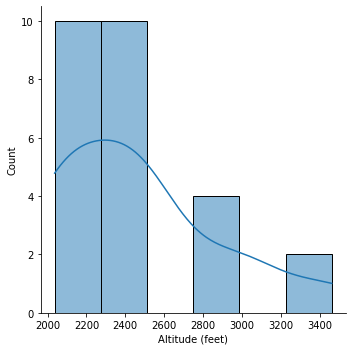

In [72]:
#Looking at the distribution of heights
#  TODO: change these into AGL bins + manually add in the 2018 AGLs... they are all at pretty much on of four altitudes!
actual_agls = (image_metadata['Altitude_m'] - 600) * 3.281 #converting from above sea level to AGL in meters, then converting to feet
sns.displot(x = actual_agls, kde = True)
plt.xlabel('Altitude (feet)');

In [73]:
#Checking how this pans out for our test set
seed_everything(SEED)
indices = torch.randperm(len(image_fps)).tolist()
test_indices = indices[28 : ]
test_images = list(np.array(image_fps)[test_indices])

test_metadata = metadata[metadata['Image_ID'].str.upper().isin([fp.upper() for fp in test_images])]
print(list((test_metadata['Altitude_m'] - 600) * 3.281))

Global seed set to 1693


[2470.0720900577376, 2038.0985341769458, 2983.7336317445825, 2465.9407660078145, 2466.057607818898]
